## Imports

In [1]:
import os

###############################
# FOR FLOYDHUB
###############################

# os.environ["DATAGET_HOME"] = "/data"
# os.environ["MODEL_PATH"] = "/model"

###############################

from scipy.misc import imread
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dataget import data # <== dataget
import tensorflow as tf
from name import network_name, model_path
from tfinterface.supervised import SupervisedInputs

%matplotlib inline

## Obtener Dataset
Utilizando la funcion `data` de `dataget` llamamos el dataset `german-traffic-signs` y ejecutamos el metodo `get` por si acaso aun no tenemos los datos. Podriamos excluir el llamado a `.get()` si ya descargamos los datos desde la consola, sin embargo, `get` no descargara los datos si ya existen por lo tanto no hace daño tenerlo.

In [2]:
dataset = data("cifar10").get()

### Random Batch DataFrame
Para fines de visualizacion, a continuacion vamos a obtener un dataframe de 10 filas con imagenes aleatorias del `training_set` utilizando el metodo `random_batch_dataframe_generator`, este nos devuelve un generador "infinito" por lo cual utilizamos la funcion `next` para obtener solo el primer dataframe.

In [3]:
# obtener todas la imagenes (lento)
# df = dataset.training_set.dataframe()

# obtener 10 imagenes aleatorias (rapido)
df = next(dataset.training_set.random_batch_dataframe_generator(10))

df

,class_id,filename,image
43725,6,/home/carlosbd/retoColombIA/supervised-avanzad...,"[[[120, 124, 47], [152, 159, 82], [121, 128, 5..."
47621,9,/home/carlosbd/retoColombIA/supervised-avanzad...,"[[[29, 46, 27], [32, 47, 28], [19, 33, 16], [1..."
41260,6,/home/carlosbd/retoColombIA/supervised-avanzad...,"[[[91, 75, 60], [91, 75, 60], [91, 75, 60], [9..."
45286,9,/home/carlosbd/retoColombIA/supervised-avanzad...,"[[[169, 191, 232], [170, 192, 231], [173, 193,..."
33185,0,/home/carlosbd/retoColombIA/supervised-avanzad...,"[[[135, 163, 213], [128, 156, 206], [119, 147,..."
3292,1,/home/carlosbd/retoColombIA/supervised-avanzad...,"[[[72, 103, 121], [89, 116, 135], [70, 91, 108..."
42290,6,/home/carlosbd/retoColombIA/supervised-avanzad...,"[[[76, 60, 37], [98, 80, 56], [96, 79, 53], [8..."
16471,3,/home/carlosbd/retoColombIA/supervised-avanzad...,"[[[43, 13, 2], [91, 40, 11], [140, 67, 16], [1..."
43307,6,/home/carlosbd/retoColombIA/supervised-avanzad...,"[[[152, 190, 113], [119, 155, 81], [46, 77, 9]..."
43551,6,/home/carlosbd/retoColombIA/supervised-avanzad...,"[[[188, 188, 196], [188, 188, 196], [188, 188,..."


Como vemos, el dataframe tiene los atributos `filename` que nos indica el nombre del archivo, `class_id` es la clase a la que corresponde la imagen, e `images` el cual contiene la informacion de la imagen representada como arreglos de numpy. Los otros atributos nos dicen la informacion del bounding box pero estos nos son relevantes para la tarea que queremos realizar.

### Visualizacion de las muestras
Para visualizar las muestras iteramos sobre el dataframe y utilizamos la funcion `imshow` de `matplotlib.pyplot` el cual importamos como `plt`.

class: 6, shape: (32, 32, 3)


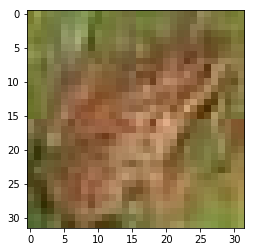

class: 9, shape: (32, 32, 3)


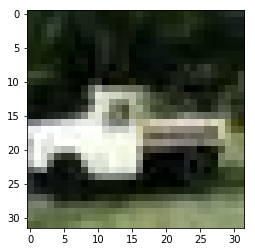

class: 6, shape: (32, 32, 3)


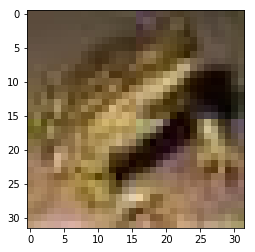

class: 9, shape: (32, 32, 3)


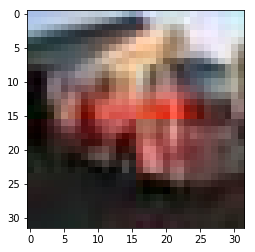

class: 0, shape: (32, 32, 3)


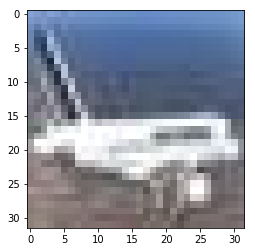

class: 1, shape: (32, 32, 3)


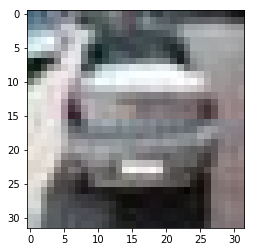

class: 6, shape: (32, 32, 3)


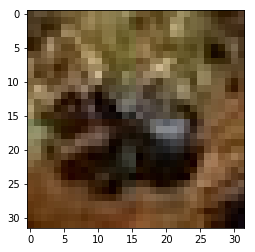

class: 3, shape: (32, 32, 3)


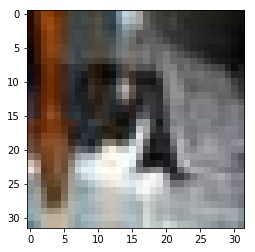

class: 6, shape: (32, 32, 3)


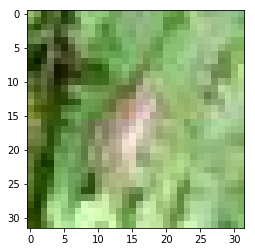

class: 6, shape: (32, 32, 3)


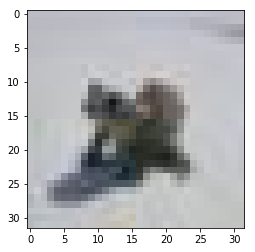

In [4]:
for i, row in df.iterrows():
    img = row.image
    print("class: {}, shape: {}".format(row.class_id, img.shape))
    plt.imshow(img)
    plt.show()

### Numpy Arrays
Para trabajar librarias de Machine Learning usualmente es mas facil obtener los datos como arreglos de numpy, para esto utilizamos los metodos `arrays` o `random_batch_arrays_generator` los cuales nos devuelven una tupla o un generador de tuplas, cada tupla contiene un arreglo `features` con las imagenes y un arreglo `labels` con las clases.

In [4]:
# obtener todas las imagenes (lento)
features, labels = next(dataset.test_set.random_batch_arrays_generator(32))

print("Features shape: {} \nLabels shape: {}".format(features.shape, labels.shape))

Features shape: (32, 32, 32, 3) 
Labels shape: (32,)


In [7]:
from model import Model

graph = tf.Graph()
sess = tf.Session(graph=graph)

# inputs
inputs = SupervisedInputs(
    name = network_name + "_inputs",
    graph = graph,
    sess = sess,
    # tensors
    features = dict(shape = (None, 32, 32, 3)),
    labels = dict(shape = (None,), dtype = tf.uint8)
)

template = Model(
    n_classes = 43,
    name = network_name,
    model_path = model_path,
    graph = graph,
    sess = sess
)

inputs = inputs()
model = template(inputs)

model.initialize(restore = True)

INFO:tensorflow:Restoring parameters from /data/cristian/german-traffic-signs/models/red-mediana


class 4, top predictions: 4, 1, 0, 8, 5


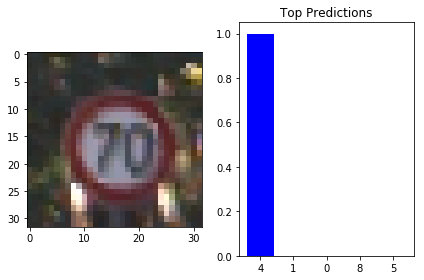

class 13, top predictions: 13, 25, 15, 38, 2


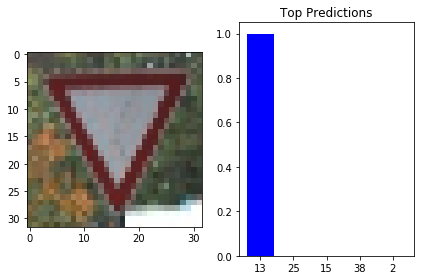

class 11, top predictions: 11, 26, 24, 30, 20


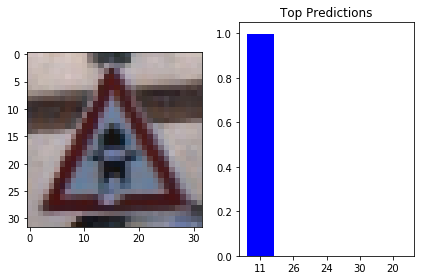

class 7, top predictions: 7, 5, 8, 10, 1


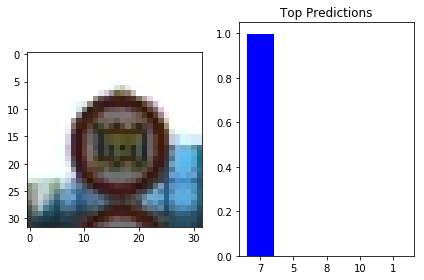

class 25, top predictions: 25, 23, 38, 30, 29


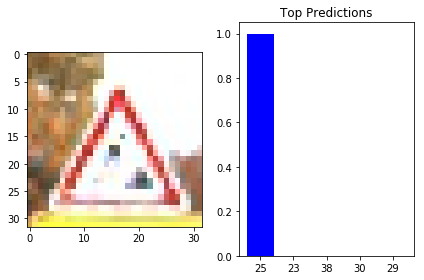

class 13, top predictions: 13, 15, 12, 14, 38


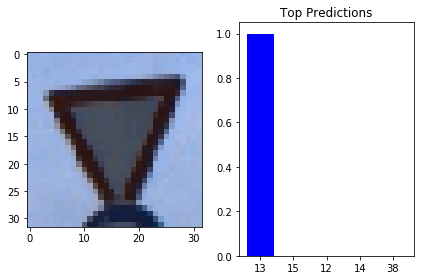

class 36, top predictions: 36, 25, 38, 2, 5


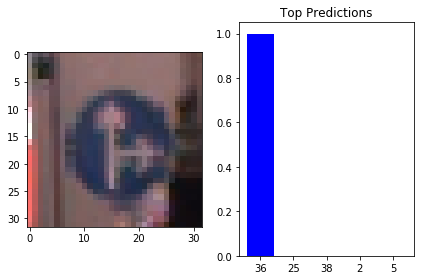

class 10, top predictions: 10, 5, 42, 11, 31


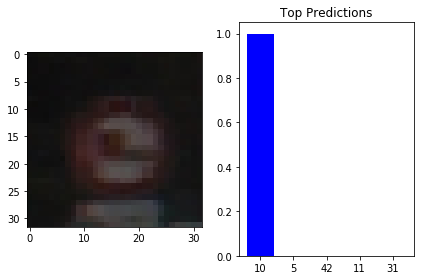

class 30, top predictions: 30, 11, 7, 28, 23


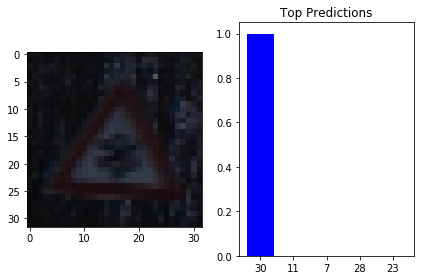

class 25, top predictions: 11, 28, 27, 24, 35


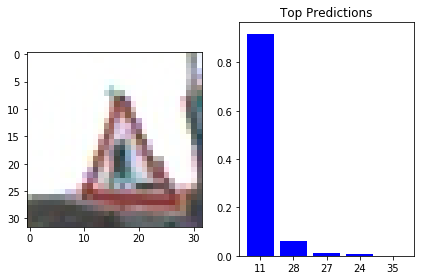

class 18, top predictions: 18, 11, 24, 20, 26


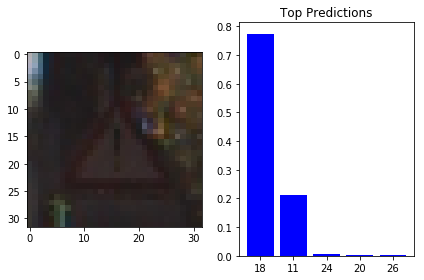

class 17, top predictions: 17, 41, 42, 9, 20


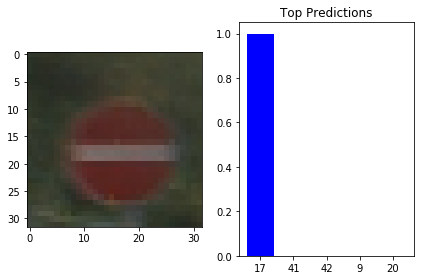

class 4, top predictions: 4, 14, 1, 8, 7


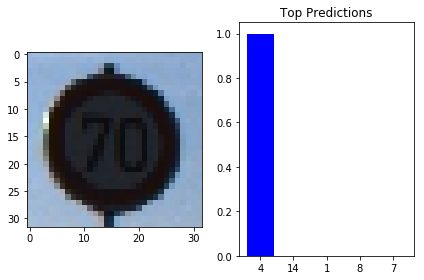

class 29, top predictions: 29, 23, 31, 30, 20


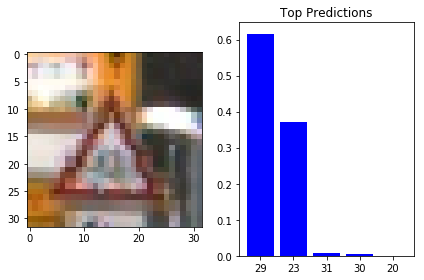

class 4, top predictions: 4, 1, 2, 5, 7


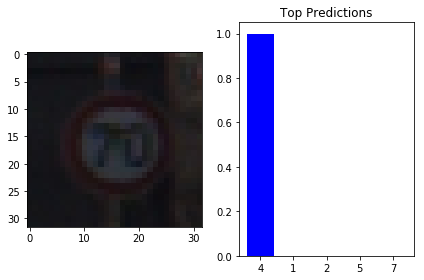

class 17, top predictions: 17, 14, 40, 41, 20


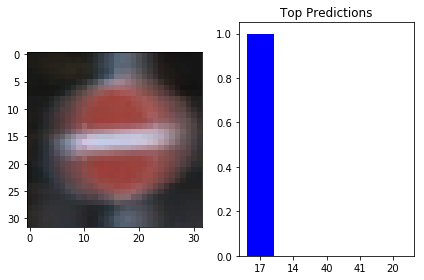

class 22, top predictions: 22, 26, 25, 17, 20


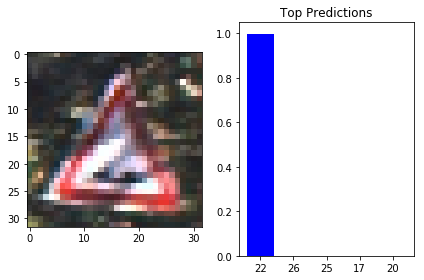

class 35, top predictions: 35, 15, 36, 20, 28


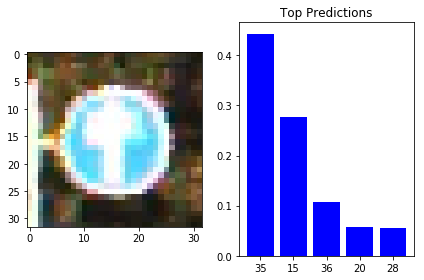

class 5, top predictions: 5, 2, 1, 3, 8


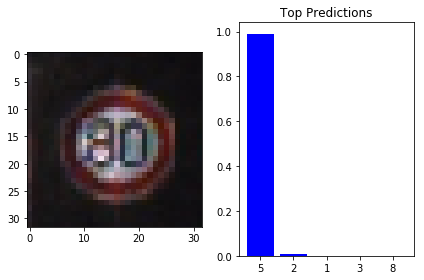

class 7, top predictions: 7, 8, 5, 10, 40


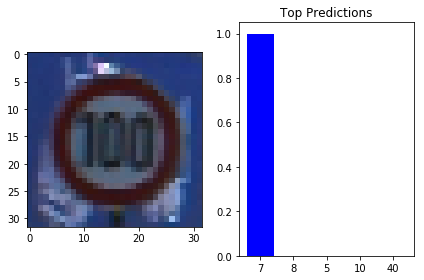

class 12, top predictions: 12, 40, 11, 17, 16


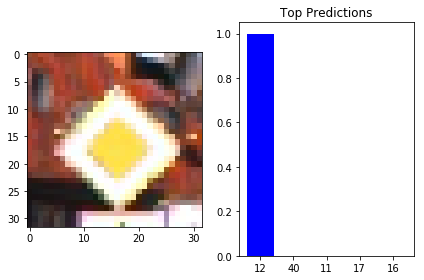

class 23, top predictions: 23, 30, 20, 24, 11


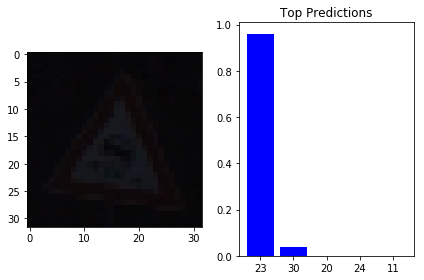

class 4, top predictions: 4, 1, 8, 2, 7


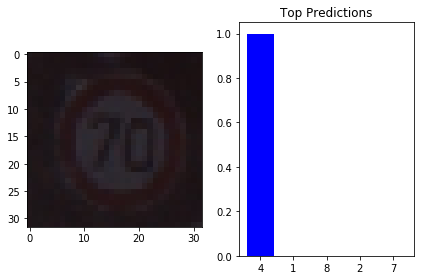

class 1, top predictions: 1, 4, 2, 5, 7


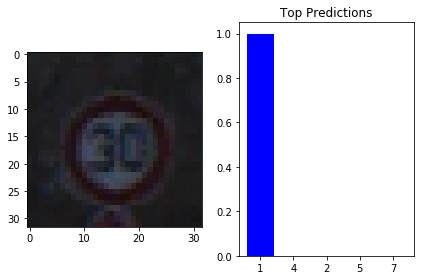

class 4, top predictions: 4, 1, 2, 5, 8


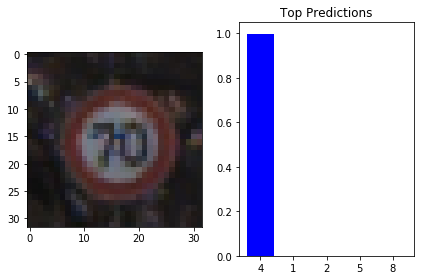

class 17, top predictions: 17, 41, 32, 38, 20


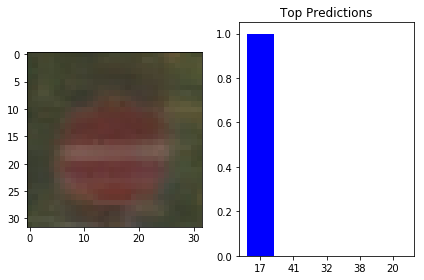

class 10, top predictions: 10, 9, 7, 42, 16


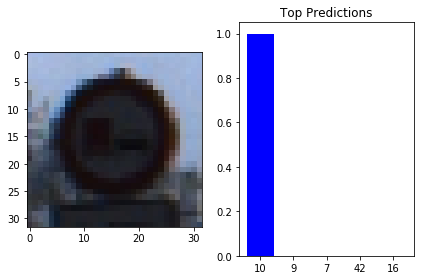

class 18, top predictions: 28, 24, 30, 25, 29


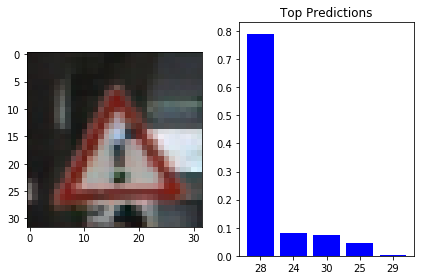

class 22, top predictions: 22, 25, 23, 26, 30


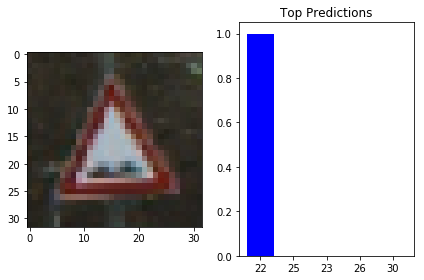

class 31, top predictions: 31, 23, 21, 19, 25


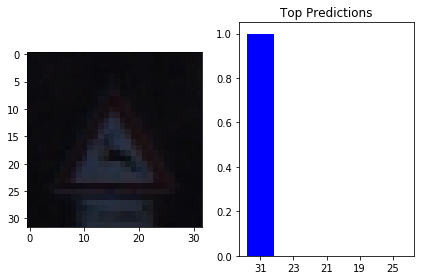

class 11, top predictions: 11, 28, 27, 24, 30


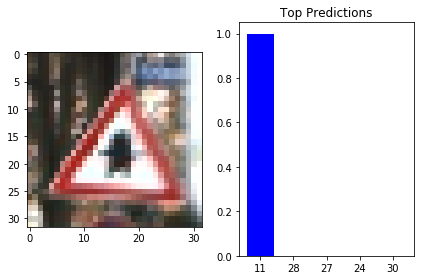

class 18, top predictions: 18, 26, 24, 11, 1


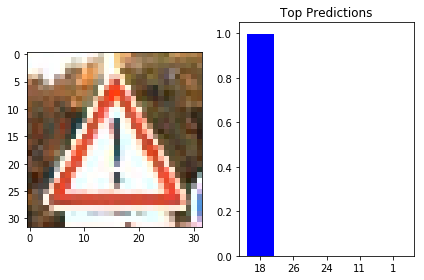

In [8]:
predictions = model.predict(features = features)

for img, label, preds in zip(features, labels, predictions):
    top_preds = np.argsort(preds)[-5:][::-1]
#     top_preds = [ "top {}: {}".format(i+1, p) for i, p in enumerate(top_preds) ]
    top_preds_str = list(map(str, top_preds))
    top_preds_str = ", ".join(top_preds_str)
    
    f, (ax1, ax2) = plt.subplots(1, 2) #, figsize=(10,10))
    ax1.imshow(img)
#     ax1.set_title('True Class: {}'.format(label))
#     ax1.autoscale(False)
    
    ax2.bar(range(len(top_preds)), preds[top_preds], color="blue")
    ax2.set_title('Top Predictions'.format(label))
#     ax2.autoscale(False)
    xTickMarks = list(map(str, top_preds))
    xtickNames = ax2.set_xticklabels(xTickMarks)
    ax2.set_xticks(range(len(top_preds)))
    
    f.tight_layout()
    
    print("class {}, top predictions: {}".format(label, top_preds_str))
    plt.show()